In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [157]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [159]:
print(train_df.head())
print(train_df.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [161]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [163]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [165]:
train_df.shape, test_df.columns

((891, 12),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [167]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (891, 11)
y shape: (891,)


In [169]:
dftrain = pd.concat([train_df,test_df], axis=1)

In [171]:
X = train_df.drop(columns=['Survived'])  # all columns except 'Survived'
y = train_df['Survived']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (891, 11)
y shape: (891,)


In [173]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


(668, 11) (223, 11) (668,) (223,)


In [175]:
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x = train_df['Age'],
    y = train_df['Pclass'],
    hue = y
);

plt.plot(
    [0,0], [0,60], color = 'red'
);

plt.plot(
    [0,3],[0,0.5], color = 'red'
);     

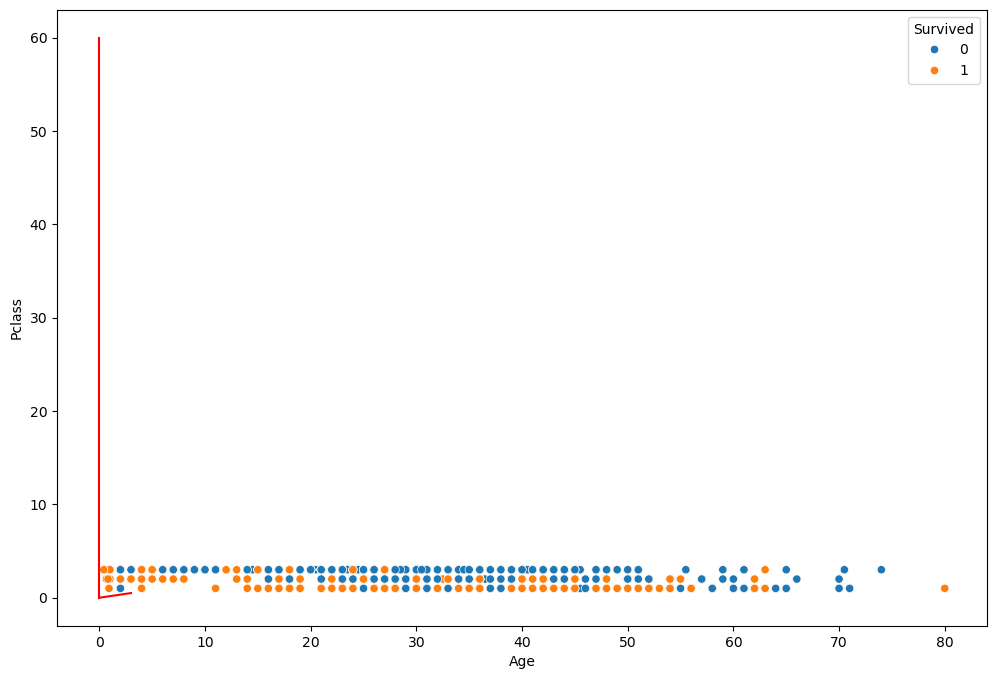

In [179]:
plt.show()

In [181]:
# Define function to calculate Gini Impurity
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    random_observation_survived_prob = survival_prob
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survived_prob = not_survival_prob * random_observation_survived_prob
    mislabelling_not_survived_prob = survival_prob * random_observation_not_survived_prob
    gini_impurity = mislabelling_survived_prob + mislabelling_not_survived_prob
    return gini_impurity

In [183]:
# Gini Impurity of starting node
gini_impurity_starting_node = get_gini_impurity(342, 891)
gini_impurity_starting_node

0.47301295786144265

In [185]:
# Gini Impurity decrease of node for 'male' observations
gini_impurity_men = get_gini_impurity(200, 577)
gini_impurity_men

0.4529494276557465

In [187]:
X_train['Embarked'].fillna('S', inplace=True)
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)

C:\Users\Farhe\AppData\Local\Temp\ipykernel_6788\1138383623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Embarked'].fillna('S', inplace=True)
C:\Users\Farhe\AppData\Local\Temp\ipykernel_6788\1138383623.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [189]:
X_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [197]:
# Removing less important features
X_train.drop('Name', axis=1, inplace=True)
X_train.drop('Ticket', axis=1, inplace=True)
X_train.drop('Cabin', axis=1, inplace=True)

KeyError: "['Name'] not found in axis"

In [199]:
X_train['Sex'] = X_train['Sex'].replace({'male' : 1, ' female': 0})
X_train['Embarked'] = X_train['Embarked'].replace({'S' : 1, 'Q': 0,'C': 2})

C:\Users\Farhe\AppData\Local\Temp\ipykernel_6788\11352975.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['Embarked'] = X_train['Embarked'].replace({'S' : 1, 'Q': 0,'C': 2})


In [201]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
298,299,1,1,28.00,0,0,30.5000,1
884,885,3,1,25.00,0,0,7.0500,1
247,248,2,female,24.00,0,2,14.5000,1
478,479,3,1,22.00,0,0,7.5208,1
305,306,1,1,0.92,1,2,151.5500,1
...,...,...,...,...,...,...,...,...
106,107,3,female,21.00,0,0,7.6500,1
270,271,1,1,28.00,0,0,31.0000,1
860,861,3,1,41.00,2,0,14.1083,1
435,436,1,female,14.00,1,2,120.0000,1


In [203]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((668, 8), (223, 11), (668,), (223,))

In [205]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
298,299,1,1,28.00,0,0,30.5000,1
884,885,3,1,25.00,0,0,7.0500,1
247,248,2,female,24.00,0,2,14.5000,1
478,479,3,1,22.00,0,0,7.5208,1
305,306,1,1,0.92,1,2,151.5500,1
...,...,...,...,...,...,...,...,...
106,107,3,female,21.00,0,0,7.6500,1
270,271,1,1,28.00,0,0,31.0000,1
860,861,3,1,41.00,2,0,14.1083,1
435,436,1,female,14.00,1,2,120.0000,1


In [207]:
# Removing less important features
X_val.drop('Cabin', axis=1, inplace=True)
X_val.drop('Name', axis=1, inplace=True)
X_val.drop('Ticket', axis=1, inplace=True)

In [209]:
X_val['Sex'] = X_val['Sex'].replace({'male' : 1, ' female': 0})
X_val['Embarked'] = X_val['Embarked'].replace({'S' : 1, 'Q': 0,'C': 2})

C:\Users\Farhe\AppData\Local\Temp\ipykernel_6788\764243221.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_val['Embarked'] = X_val['Embarked'].replace({'S' : 1, 'Q': 0,'C': 2})


In [211]:
X_val['Embarked'].fillna('S', inplace=True)
X_val['Age'].fillna(X_train['Age'].median(), inplace=True)

C:\Users\Farhe\AppData\Local\Temp\ipykernel_6788\3203091920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_val['Embarked'].fillna('S', inplace=True)
C:\Users\Farhe\AppData\Local\Temp\ipykernel_6788\3203091920.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [215]:
print(X_train.dtypes)

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object


In [219]:
# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)

In [221]:
X_val = pd.get_dummies(X_val, columns=['Sex', 'Embarked'], drop_first=True)

# Align columns (important if train/val sets have different dummy variables)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

In [223]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [231]:
clf_DT_predictions = clf_DT.predict(X_val)

In [229]:
print(clf_DT_predictions[:10])

[0 0 0 1 1 1 1 0 1 1]


In [233]:
round(accuracy_score(y_val, clf_DT_predictions), 2)

0.8

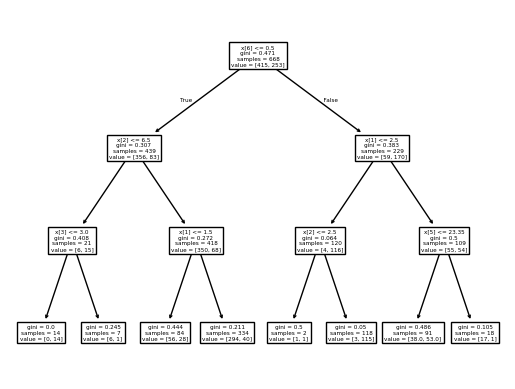

In [235]:
fig = clf_DT.fit(X_train, y_train)
tree.plot_tree(fig)
filled = True
plt.show()

In [ ]:
ss